In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\soura\\Documents\\DS_ML_assignments\\ML'

In [3]:
df=pd.read_csv('C:\\Users\\soura\\Documents\\DS_ML_assignments/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
#df.drop(['age'], axis=1, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


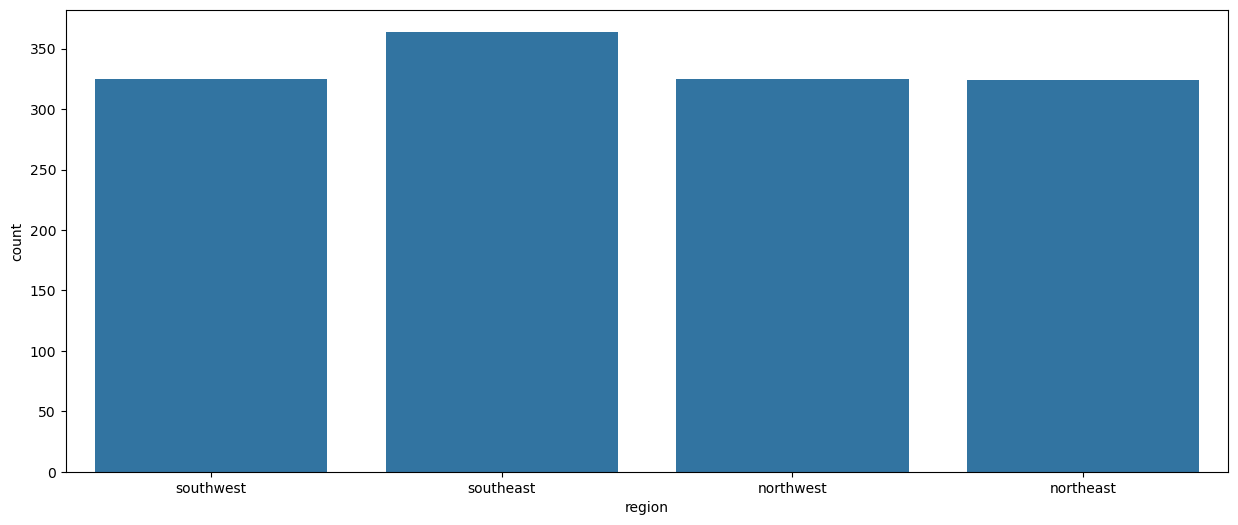

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='region',data=df)
plt.show()

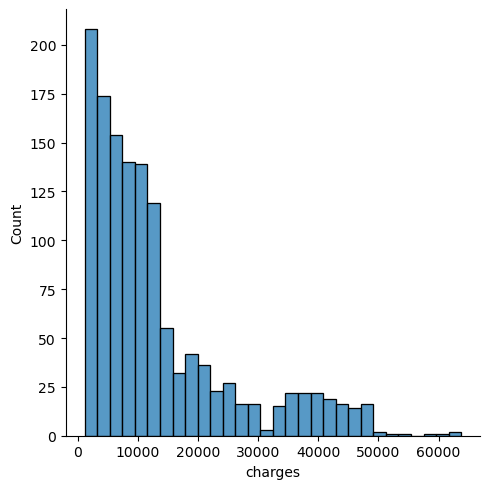

In [19]:
sns.displot(df['charges'],kind='hist')
plt.show()

In [21]:
X=df['bmi']
y=df['charges']

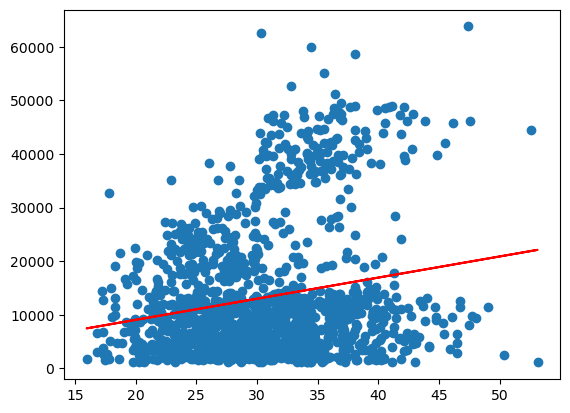

In [23]:
plt.scatter(X,y)
m,b= np.polyfit(X, y, 1)
plt.plot(X, m*X + b,'r')
plt.show()

In [25]:
df.select_dtypes(include=['object']).columns.tolist()

['sex', 'smoker', 'region']

In [27]:
df.select_dtypes(include=[np.number]).columns.tolist()

['age', 'bmi', 'children', 'charges']

In [67]:
df_num=df[['bmi','charges','age']]
df_dummies=pd.get_dummies(df[['sex']])

In [69]:
df_actual=pd.concat([df_num,df_dummies], axis=1)
df_actual

,bmi,charges,age,sex_female,sex_male
0,27.900,16884.92400,19,True,False
1,33.770,1725.55230,18,False,True
2,33.000,4449.46200,28,False,True
3,22.705,21984.47061,33,False,True
4,28.880,3866.85520,32,False,True
...,...,...,...,...,...
1333,30.970,10600.54830,50,False,True
1334,31.920,2205.98080,18,True,False
1335,36.850,1629.83350,18,True,False
1336,25.800,2007.94500,21,True,False


In [71]:
X=df_actual.drop(['charges'], axis=1)
X

,bmi,age,sex_female,sex_male
0,27.900,19,True,False
1,33.770,18,False,True
2,33.000,28,False,True
3,22.705,33,False,True
4,28.880,32,False,True
...,...,...,...,...
1333,30.970,50,False,True
1334,31.920,18,True,False
1335,36.850,18,True,False
1336,25.800,21,True,False


In [73]:
y=df_actual['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [75]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=12)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1070, 4), (1070,), (268, 4), (268,))

In [77]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression()

In [79]:
lm.fit(X_train,y_train)

LinearRegression()

In [81]:
print(lm.intercept_)
print(lm.coef_)

-6301.64798588492
[ 334.38897091  239.217162   -654.26346373  654.26346373]


In [83]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bmi,334.388971
age,239.217162
sex_female,-654.263464
sex_male,654.263464


In [85]:
y_pred = lm.predict(X_test)
print(y_pred)

[14821.22665588 10819.18521476 11410.58252387 12396.77756896
  8033.63538455  8589.88250642  7734.45263455 23290.40730751
 13299.45939732 13198.36841928 15144.68629957 16506.80516487
 14698.92226238  8579.46369391  7833.0917045   6928.69858597
 12077.81756864 16175.85546263  8436.66379699 17700.70283883
 14383.78299765 10505.16269947 16463.94616879 15327.2760868
  9192.51191905  5848.62220992 17160.63098197 19260.75643593
 11888.21456875 16876.65845228 12318.54395887 11357.59080323
 14419.83651946 17569.52252988 14477.44557833 10008.68478015
 11551.25031842 13182.04179059 12750.58463915 22047.76513718
  9748.92175755  9870.03672854 18803.38416372 14313.85875465
  7786.40629636 13759.27790116 15325.63781078 12015.7928924
 20983.60025408 13661.88428738 17751.50642344 13572.373552
 13154.42668366 13283.13276863 21016.30420971  6297.21962212
  9262.60455515 16132.38489641 18580.66202351 16279.51604361
 20454.49139327 12156.14088122 11478.22892835 12320.47399931
  9126.70017606 11201.202273

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared

0.11339461960765185

In [89]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 127681300.55796067
Root_Mean_Squared_Error : 11299.61506237981
r_square_value : 0.11339461960765185


In [91]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
936,32108.66282,14821.226656
728,2217.60120,10819.185215
1307,21472.47880,11410.582524
924,6250.43500,12396.777569
137,2045.68525,8033.635385
...,...,...
224,19515.54160,12639.080525
1245,5615.36900,9176.348007
1086,10796.35025,17198.479820
912,14382.70905,16084.414687
